In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score
from keras.models import Sequential
from sklearn import model_selection
from keras.layers import Dense

In [11]:
data = pd.read_csv('dados.csv', sep=',')
display(data)

,MADE,SHOT TYPE,PERIOD,TIME REMAINING,SHOT DISTANCE (FT),is_home,off_win_rate,def_blocks,def_win_rate,Age,Height,Weight,DRAFT NUMBER
0,1,2,1,675,13,1,0.621951,435,0.621951,29,195.072,100.000000,6
1,0,3,1,402,22,1,0.621951,435,0.621951,29,195.072,100.000000,6
2,0,2,1,205,6,1,0.621951,435,0.621951,29,195.072,100.000000,6
3,1,2,2,453,9,1,0.621951,435,0.621951,29,195.072,100.000000,6
4,0,2,2,393,6,1,0.621951,435,0.621951,29,195.072,100.000000,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209621,1,2,1,189,13,0,0.439024,460,0.560976,29,201.168,90.909091,40
209622,0,3,2,614,24,0,0.439024,460,0.560976,29,201.168,90.909091,40
209623,0,2,2,225,7,0,0.439024,460,0.560976,29,201.168,90.909091,40
209624,0,2,4,640,8,0,0.439024,460,0.560976,29,201.168,90.909091,40


### Normalizando os dados

In [12]:
data_normalizado = data.copy()
for column in data_normalizado.columns:
    data_normalizado[column] = data_normalizado[column] / data_normalizado[column].abs().max()
    # data_normalizado[column] = (data_normalizado[column] - data_normalizado[column].min()) / (data_normalizado[column].max() - data_normalizado[column].min())

display(data_normalizado)

,MADE,SHOT TYPE,PERIOD,TIME REMAINING,SHOT DISTANCE (FT),is_home,off_win_rate,def_blocks,def_win_rate,Age,Height,Weight,DRAFT NUMBER
0,1.0,0.666667,0.166667,0.937500,0.158537,1.0,0.796875,0.816135,0.796875,0.674419,0.864865,0.758621,0.06
1,0.0,1.000000,0.166667,0.558333,0.268293,1.0,0.796875,0.816135,0.796875,0.674419,0.864865,0.758621,0.06
2,0.0,0.666667,0.166667,0.284722,0.073171,1.0,0.796875,0.816135,0.796875,0.674419,0.864865,0.758621,0.06
3,1.0,0.666667,0.333333,0.629167,0.109756,1.0,0.796875,0.816135,0.796875,0.674419,0.864865,0.758621,0.06
4,0.0,0.666667,0.333333,0.545833,0.073171,1.0,0.796875,0.816135,0.796875,0.674419,0.864865,0.758621,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209621,1.0,0.666667,0.166667,0.262500,0.158537,0.0,0.562500,0.863039,0.718750,0.674419,0.891892,0.689655,0.40
209622,0.0,1.000000,0.333333,0.852778,0.292683,0.0,0.562500,0.863039,0.718750,0.674419,0.891892,0.689655,0.40
209623,0.0,0.666667,0.333333,0.312500,0.085366,0.0,0.562500,0.863039,0.718750,0.674419,0.891892,0.689655,0.40
209624,0.0,0.666667,0.666667,0.888889,0.097561,0.0,0.562500,0.863039,0.718750,0.674419,0.891892,0.689655,0.40


### Dividindo X e Y para o modelo

In [13]:
X = np.array(data_normalizado.drop(['MADE'], axis=1))
y = np.array(data_normalizado['MADE'])

### Dividindo os dados de treino e teste

In [14]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=23, test_size=0.2)

### Dividindo os dados de treino para validação

In [15]:
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train, y_train, random_state=23, test_size=0.2)

## Rede Neural

### Criando a rede neural

In [16]:
model = Sequential()
model.add(Dense(4, input_dim=12, activation='relu', use_bias = True, bias_initializer='ones'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4)                 52        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57 (228.00 Byte)
Trainable params: 57 (228.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Treinando a rede neural

In [17]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=16)

Epoch 1/10


8385/8385 [==============================] - 7s 827us/step - loss: 0.6869 - accuracy: 0.5754 - val_loss: 0.6646 - val_accuracy: 0.6070
Epoch 2/10
8385/8385 [==============================] - 8s 916us/step - loss: 0.6648 - accuracy: 0.6016 - val_loss: 0.6620 - val_accuracy: 0.6044
Epoch 3/10
8385/8385 [==============================] - 6s 741us/step - loss: 0.6633 - accuracy: 0.6023 - val_loss: 0.6615 - val_accuracy: 0.6072
Epoch 4/10
8385/8385 [==============================] - 6s 735us/step - loss: 0.6626 - accuracy: 0.6034 - val_loss: 0.6607 - val_accuracy: 0.6065
Epoch 5/10
8385/8385 [==============================] - 6s 740us/step - loss: 0.6622 - accuracy: 0.6035 - val_loss: 0.6608 - val_accuracy: 0.6090
Epoch 6/10
8385/8385 [==============================] - 6s 729us/step - loss: 0.6620 - accuracy: 0.6046 - val_loss: 0.6604 - val_accuracy: 0.6094
Epoch 7/10
8385/8385 [==============================] - 6s 732us/step - loss: 0.6617 - accuracy: 0.6049 - val_loss: 0.6611 - val_accura

In [18]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print('Ein: %0.4f' % (1 - accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print('Eout: %0.4f' % (1 - accuracy))

Ein: 0.3960
Eout: 0.3971


In [19]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print('Acurácia de treino: %0.4f' % (accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print('Acurácia de teste: %0.4f' % (accuracy))

Acurácia de treino: 0.6040
Acurácia de teste: 0.6029


### Performance do modelo

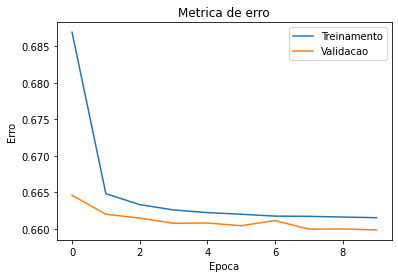

4193/4193 [==============================] - 2s 498us/step
--> Acuracia (treino): 0.6040
--> Acuracia (teste): 0.6029


In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

pred = np.round(model.predict(X_test))
pred_train = np.round(model.predict(X_train))

print(f'--> Acuracia (treino): {accuracy_score(y_train, pred_train):.4f}')
print(f'--> Acuracia (teste): {accuracy_score(y_test, pred):.4f}')

### Ocorreu overfitting?

A partir do gráfico acima é possível visualizar que não houve overfitting no modelo final da rede neural.